In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import fftconvolve

In [2]:
img = np.array(Image.open('images/frame_gray.png'))

In [22]:
kernel = np.array([
    [-1,  1],
    [ 1, -1]
])

In [23]:
conv_image = fftconvolve(img, kernel)

In [24]:
absolute = max(abs(new_img.flatten().min()), conv_image.flatten().max())

In [25]:
scaled = (new_img*255/absolute).astype(np.int16)

In [26]:
new_image = np.zeros(
    tuple(conv_image.shape) + (3,),
    dtype=np.uint8
)

red = conv_image.copy()
np.place(red, red > 0, 0)
red = abs(red)
np.place(red, red > np.ceil(red.flatten().mean()), 255)
np.place(red, red <= np.ceil(red.flatten().mean()), 0)

blue = conv_image.copy()
np.place(blue, blue < 0, 0)
np.place(blue, blue > np.ceil(blue.flatten().mean()), 255)
np.place(blue, blue <= np.ceil(blue.flatten().mean()), 0)

new_image[:,:,0] = red.astype(np.uint8)
new_image[:,:,2] = blue.astype(np.uint8)

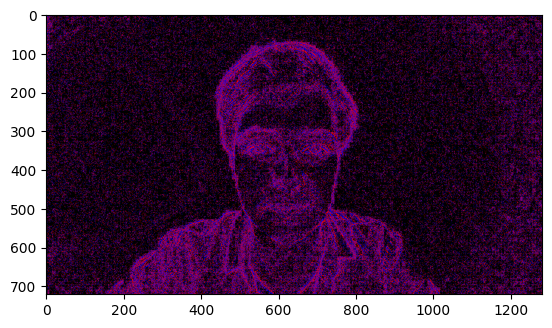

In [27]:
plt.imshow(new_image)